## Coding the Opentrons OT-2 Tutorial

The Opentrons OT-2 has its own python library which we will use to advantage. We need to start by installing it. Run the below cell to download it (! runs everything after it in CMD)

In [ ]:
!python -m venv opentrons_env
!opentrons_env\Scripts\activate
!pip install opentrons

## Creating the code

Now we have installed the python API we can get to coding. Opentrons supplies a basic template for us so we will start with that and divide it into sections

## Section 1 - metadata

Setting the metadata up may seem useless, but it is very important as it will help us keep track of the programs we have uploaded into the OT-2 and also ensure that the API version we are using is compatiable

In [2]:
import random
from opentrons import protocol_api

# Metadata
metadata = {
    "apiLevel": "2.14",
    "protocolName": "# Your code here",
    "description": "# Your code here",
    "author": "# Your code here"
}

## Section 2 - Setting Up Our Arrays

We will be using arrays to specify the amounts of each standard solution for the OT-2. Since we are investigating around the Ksp line, we can generate a random data set within a specific range of values using Python's built-in `random` function.

Our well plate consists of 96 wells, each with a 100 µL max volume (75 µL for safety). For each well, we need to define:
- **Glycine volume**
- **Copper volume**
- **Water volume**

To achieve this, we will break the process into four steps.

### 1 - Generating Glycine Volume
Since we are working with a 2:1 stoichiometric ratio, we assume that a dominant solution volume will not precipitate. This allows us to define a reasonable range for random values (e.g., 25 to 50 µL).

**Task:** How can we generate a random value within this range?

### 2 - Generating Copper Volume
Once we have our glycine values, we must generate copper values while considering constraints.

**Task:** If we randomly generate another set of values, what conditions must we impose to ensure valid experimental conditions?

### 3 - Generating Water Volume
Now that we have assigned glycine and copper values, calculating the water volume should be straightforward.

**Task:** How can we ensure that the total volume does not exceed 75 µL?

### 4 - Storing the Data
The data can be stored in various formats—lists, arrays, dictionaries, etc. However, grouping the data effectively will make further processing easier.

**Task:** Which data structure would be the most useful for this experiment? Why?


In [3]:
def generate_random_data():
    """Generates 96 random Cu and Glycine values ensuring an even spread and sum ≤ 75."""
    data = [] # Creates an empty list for data storage

    # Your code here
    
    return data

## Section 3 - Writing the Instructions for the OT-2

Now that we have generated our data, we need to write the protocol that the OT-2 robot will follow. This involves:
1. Loading labware and pipettes.
2. Defining liquids and assigning them to the reservoir.
3. Pipetting solutions into the 96-well plate following the generated values.
4. Using the heater-shaker module for mixing and heating.

---

### 1. Loading labware and pipettes.
Before the OT-2 can pipette liquids, we must load:
- A tip rack for disposable pipette tips. 
- A reservoir containing our stock solutions. ID: "nest_12_reservoir_15ml"
- A heater-shaker module holding our 96-well plate. ID: "heaterShakerModuleV1"

#### **Task:** Fill in the missing labware names where needed.

**Here is a top down view of the deck slots:**
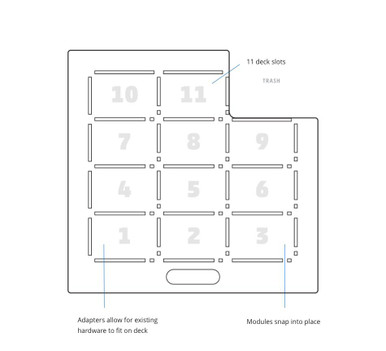

In [4]:
def setup_labware(protocol):
    """Defines the protocol steps for the OT-2 robot."""
    
    # Load labware
    tips_single = protocol.load_labware("opentrons_96_tiprack_1000ul", # Your code here (slot number) )
    reservoir = # How can we load the reservior?
    heater_shaker = # How can we load the heater shaker? Is it a labware or a module?
    
    # Load 96-well plate onto the heater-shaker module
    plate = heater_shaker.load_labware("nest_96_wellplate_100ul_pcr_full_skirt")
    return tips_single, reservoir, heater_shaker, plate

### 2. Defining liquids and assigning them to the reservoir.
- The `define_liquid()` function assigns a **name, description, and color** for visual tracking.
- Each liquid must be assigned a **correct reservoir well**.
- Colors should match the expected appearance of each liquid:
  - **Water** is clear or blue.
  - **Copper Solution** is typically dark blue.
  - **Glycine Solution** is colorless or white.

#### Task:
- Define a **hex color** for each liquid.
- Assign the **correct well (A1, A2, A3)** for each liquid.


In [5]:
# Cell 2: Defining and Loading Liquids
def define_liquids(protocol, reservoir):
    # Define liquids with a display color (use hex codes, e.g., "#00FFFF")
    di_water = protocol.define_liquid(name="DI Water", description="Diluent", display_color="# Your code here (hex code)")  
    cu_solution = # Your Code Here
    gly_solution = # Your Code Here
    
    # Load liquids into the reservoir wells
    reservoir["A1"].load_liquid(liquid="# Your code here (liquid variable name)", volume="# Your code here (in uL)")
    # Now you have the hang of it try loading the other two by yourself
    return di_water, cu_solution, gly_solution

### 3. Pipetting solutions into the 96-well plate following the generated values.
- The `load_instrument()` function assigns a **pipette model**, a **mount (left or right)** and a **tip rack**.
- The `p1000_single_gen2` pipette is used for **volumes up to 1000 µL**.
- The pipette needs **tip racks** to pick up disposable tips.

#### Task:
- Verify that the correct pipette model is used.
- Why do we use the **right mount**? Could it be changed?


In [6]:
# Cell 3: Loading the Pipette
def loading_pipette(protocol):
    # Load the pipette on the right mount using the specified tip rack from above
    # Your code here
    return pipette

### Guidance:
- The `generate_random_data()` function should generate **valid Cu and Glycine values**.
- We use `right_pipette.distribute()` to **distribute Cu values in bulk**.
- The `new_tip='never'` parameter ensures the **same tip** is used for all wells.
- `touch_tip=True` prevents droplets from remaining on the pipette tip.

#### Task:
- Identify the correct **dictionary key** (`"cu_array"`) for Cu volumes.
- Assign the **correct reservoir slot** for Cu stock solution.

#### Extra task:
- Why might we use distribute over other functions (see below) 

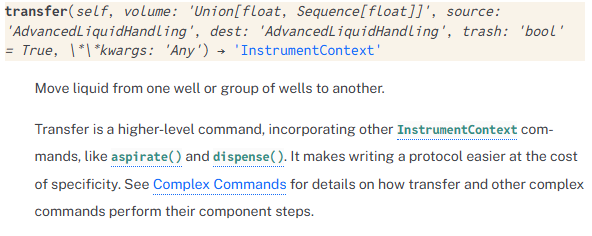
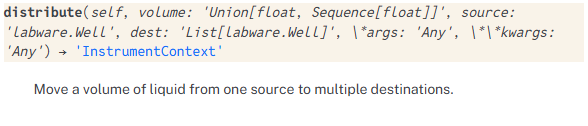
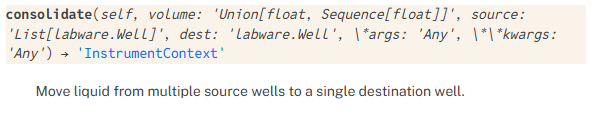

In [7]:
# Cell 4: Distributing Solutions - Part 1 (Distribute Cu)
def distributing_cu(protocol, plate, pipette, results, reservior):
    # Calls the funtion to generate our random data
    results = generate_random_data()
    well_mapping = plate.wells() # creates a list of our wells

    # Close the labware latch before pipetting
    heater_shaker.close_labware_latch()

    # Step 1: Distribute Cu values in bulk
    pipette.pick_up_tip()
    cu_volumes = [result["# Your code here (key value)"] for result in results[:len(well_mapping)]]  # What key holds Cu values?
    pipette.distribute(cu_volumes, reservoir["# Your code here (reservoir slot no.)"], [well.top() for well in well_mapping],
                             new_tip='never', touch_tip=True)
    pipette.drop_tip()

### Guidance:
- The `"remaining"` key ensures that the **total well volume does not exceed 75 µL**.
- DI Water is **added second** to dilute the Cu solution before mixing.

#### Task:
- Why is it **important** to add DI Water before Glycine? (What does this allow us to double check?)


In [8]:
# Cell 5: Distributing Solutions - Part 2 (Distribute DI Water)
def distributing_water(protocol, plate, pipette, results, reservior):
    # Step 2: Distribute DI Water in bulk
    # Now you have an example can you do the same for the DI water?
    pass

### 4. Using the heater-shaker module for mixing and heating.
- The **temperature** must be set **high enough** to dissolve solids but not **overheat the plate**.
- The **shaking speed** should prevent overflow but ensure proper mixing.

#### Task:
- Fill in a reasonable **temperature** and **shaking speed**.

#### Extra Task:
- Why do we heat to only 70 degrees? (Is there another compound we don't want to form?)


In [9]:
# Cell 6: Heating and Shaking Steps
def heating_and_shaking():
    # Heating and shaking steps to prepare the plate before adding glycine
    heater_shaker.set_target_temperature(70)
    protocol.delay(minutes=5)  # Allow time for heating
    heater_shaker.set_and_wait_for_shake_speed("# Your code here")  # What speed should be used? (Think about using stirrer bar)
    protocol.delay(minutes=2)
    heater_shaker.deactivate_shaker()
    # Now can you deactivate the heater?


## 5. Distributing the glycine:
- Glycine is added **last**, after Cu and DI Water have been mixed.
- The `"gly_array"` key contains the Glycine volumes.

#### Task:
- Identify the correct **dictionary key** for Glycine volumes.
- Assign the correct **reservoir well** for Glycine stock solution.


In [10]:
# Cell 7: Distributing Solutions - Part 3 (Distribute Glycine)
def distributing_gly(protocol, plate, pipette, results, reservior):
    # Step 3: Distribute Glycine in bulk after heating and shaking
    # Can you give distributing the solution another go like above?
    pass

### Finalising the protocol:
- A `protocol.comment()` ensures **clear feedback** when the OT-2 completes the run.

#### Task:
- Why is a final comment useful in automation?


In [11]:
# Cell 5: Define the Main run() Function
def run(protocol: protocol_api.ProtocolContext):
    """Main OT-2 protocol"""
    
    # Setup labware
    tips_single, reservoir, heater_shaker, plate = setup_labware(protocol)
    
    # Define liquids
    define_liquids(protocol, reservoir)
    
    # Load pipette
    pipette = protocol.load_instrument("p1000_single_gen2", "right", tip_racks=[tips_single])
    
    # Generate random data
    results = generate_random_data()
    
    # Distribute solutions
    distribute_solutions(protocol, pipette, reservoir, plate, results)
    
    protocol.comment("Protocol complete.")


## Simulating Code

Now that we have written the full protocol, we will simulate it using Opentrons' built-in simulation feature.

### Why simulate?
- Detect **errors** before running on the OT-2.
- Verify **pipetting steps, liquid volumes, and order of operations**.
- Ensure that the **protocol runs without unexpected failures**.

### Guidance:
- The `simulate` function runs the OT-2 script **without physically executing it**.
- `ProtocolContext()` creates a **virtual environment** for testing.


In [ ]:
# Import Opentrons API for simulation
from opentrons.simulate import get_protocol_api, format_runlog

# Create a simulation protocol context
protocol_context = get_protocol_api("2.13")  # Ensure correct API version

# Run the protocol with the simulation context
run(protocol_context)  # Directly execute the protocol

## **Analyzing and Verifying the Simulation Output**

Now that we have simulated the protocol, we need to **check the output log** to ensure that the OT-2 will execute the steps correctly. The log provides a **detailed breakdown** of every action performed, including pipetting, tip handling, and module usage.

### **1 - Understanding the Simulation Log**
After running the simulation, the output will look something like this:



Picking up tip from A1 of Opentrons 96 Tip Rack 1000 µL on deck slot 10 Aspirating 50.0 µL from A1 of Nest 12 Reservoir 15 mL on deck slot 4 Dispensing 50.0 µL into A1 of Nest 96 Well Plate 100 µL PCR Full Skirt on deck slot 7 Touching tip to side of A1 of Nest 96 Well Plate 100 µL PCR Full Skirt on deck slot 7 Dropping tip in Opentrons Fixed Trash on deck slot 12


Each line represents a **specific action** performed by the robot.

**Tip Handling** – Picking up and dropping tips.  
**Liquid Transfers** – Aspirating (pulling up liquid) and dispensing (delivering liquid).  
**Locations** – Verifying labware positions (e.g., slot numbers).  
**Volumes** – Ensuring the correct µL values are transferred.  
**Errors & Warnings** – Any issues with the protocol will appear in red.

### **2 - Verifying the Simulation Output**
Now, check if the simulation matches your expectations. Below are key checks:

#### **Labware Setup**
- Are all **labware items loaded correctly** in the right deck slots?
- Example: If the **reservoir is in slot 4**, does the log reference it correctly?

#### **Pipetting Steps**
- Are **correct volumes** being transferred?
- Is the pipette **picking up a tip before aspirating**?
- Are tips being **discarded after use**?

#### **Execution Order**
- Are **Cu, DI Water, and Glycine** added in the correct sequence?
- Does **heating/shaking happen before Glycine is added**?

#### **Errors & Warnings**
- Are there any **runtime errors or missing steps**?
- Are all **well locations** correctly referenced?

### **3 - Debugging Common Issues**
If the log shows an error, refer to these common issues and fixes.

#### **Tip Not Picked Up Before Pipetting**


Aspirating 50.0 µL from A1 of Nest 12 Reservoir 15 mL on deck slot 4 RuntimeError: Pipette attempted to aspirate without a tip.

**Fix:** Ensure `pick_up_tip()` is called **before aspirating**.

#### **Pipette Volume Exceeds Capacity**


RuntimeError: Cannot aspirate 1200.0 µL, as it exceeds the pipette's max volume of 1000 µL.

**Fix:** Check that pipette **volumes match its max capacity**.

#### **Liquid Not Assigned to a Well**


RuntimeError: Well A1 of Nest 12 Reservoir 15 mL does not contain liquid.

**Fix:** Ensure `load_liquid()` is properly set up in the protocol.

### **4 - Checking the Simulation Summary**
To print a formatted version of the simulation log, use:

In [14]:
# Print the formatted simulation log
print(format_runlog(protocol_context.commands()))

### **5 - Final Verification Before Running on OT-2**
Before executing the protocol on the OT-2, do a final check:

Confirm the **liquid setup** is correct.
Verify that **pipette tips are available**.
Ensure the **well locations are as expected**.

Once the simulation output looks correct, the protocol is ready to be **run on the actual OT-2!**